# Portfolio Contents

I want to choose a couple of stock ETFs and Bond ETFs. To make things more tailored to me/people my age I'm going to pick some ETFs that are a little "Interesting", instead of just going with straightforward asset classes. Here is the list of ETFs that I am considering using:
- SPDR Gender Diversity ETF (SHE)
- ARQ

- iShares MSCI Emerging Markets ETF (EEM)
- iShares iBoxx High Yield Corporate Bond ETF (HYG)
- Vanguard Mega Cap Index Fund ETF Shares (MGC)
- iShares U.S. Real Estate ETF (IYR)
- iShares 1-3 Year Treasury Bond ETF (SHY)
- Consumer Staples Select Sector SPDR Fund (XLP)
- SPDR Gold Shares (GLD)
- Global X Lithium & Battery Tech ETF (LIT)

I'm going to create a portfolio of these funds and use SPY as comparison to find the $\Beta$ of the portfolio (as well as other stats). For the portfolio weights, I am going to find the maximum sharpe ratio. 

In [1]:
import pandas as pd                                    # Working with tables
import numpy as np

from tiingo import TiingoClient                       # Stock prices.
import quandl                                         # Economic data, futures prices, ...

# API keys:
tiingo = TiingoClient({'api_key':'349dd4117e5d1ed71a22f0207a8e439cf3f7b06b'})
quandl.ApiConfig.api_key = '_ci7hzC_sPkspKWz2yzt'                      # Replace the XXXX with your API key (must be inside the ' ').

import matplotlib.pyplot as plt                        # Basic plot library.
plt.style.use('ggplot')                                # Make plots look nice.
%matplotlib inline

In [2]:
tickers = ['AGG','ACG']
prices  = tiingo.get_dataframe(tickers, '2016-3-8', metric_name='adjClose')
prices.index = pd.to_datetime(prices.index).tz_convert(None)    # Get rid of hour, minutes, seconds in the row i
prices
spy = tiingo.get_dataframe('SPY', '2016-3-8', metric_name='adjClose')
spy.index = pd.to_datetime(spy.index).tz_convert(None)

In [3]:
spy.to_csv("C:\\Users\\selen\\Practicum Project\\spy.csv")

In [4]:
r = prices.pct_change()
r


,AGG,ACG
2016-03-08,NaN,NaN
2016-03-09,-0.000456,0.000000
2016-03-10,0.000456,-0.001292
2016-03-11,-0.001824,0.003881
2016-03-14,0.000548,0.000000
...,...,...
2022-03-16,0.000743,0.000000
2022-03-17,0.001672,0.000000
2022-03-18,0.002225,0.000000
2022-03-21,-0.009806,0.000000


In [5]:
rf = 0.011
risk_premiums = r.mean() * 252 - rf       
vol           = r.std()  * 252**0.5
cov           = r.cov()  * 252    
corr          = r.corr() 
risk_premiums

AGG    0.008733
ACG   -0.007014
dtype: float64

In [6]:
cov_inv = pd.DataFrame(np.linalg.pinv(cov.values), cov.columns, cov.index)
cov_inv

,AGG,ACG
AGG,478.645951,-56.556484
ACG,-56.556484,38473.596155


In [7]:
w_max_Sharpe = cov_inv.dot(risk_premiums)/sum(cov_inv.dot(risk_premiums))
w_max_Sharpe

AGG   -0.017219
ACG    1.017219
dtype: float64

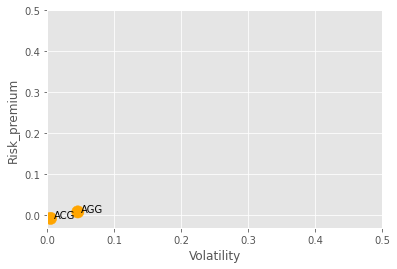

In [8]:
  # mean - volatility table
assets = pd.DataFrame()                        
assets['Risk_premium'] = risk_premiums
assets['Volatility']   = vol    
assets['Color']        = 'orange'
assets['Size']         = 150

all_portfolios = assets

graph = all_portfolios.plot.scatter('Volatility','Risk_premium', color=all_portfolios.Color, s=all_portfolios.Size, xlim=(0,0.5), ylim=(-0.03,0.5))

# add ticker symbols to plot:
for s in tickers:                                 # loop over sectors
    x = all_portfolios.loc[s,'Volatility']+0.005  # get x-coordinate from table (+ offset so the labels don't overlap with points)
    y = all_portfolios.loc[s,'Risk_premium']      # get y-coordinate from table
    graph.text(x,y,s)                             # add the ticker symbol to the graph

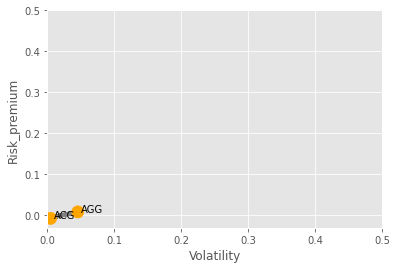

In [9]:
n_portfolios = 1000

random_arrays  = [ np.random.uniform(0,1,len(tickers)) for i in range(0,n_portfolios) ]
random_weights = [ ra/ra.sum() for ra in random_arrays ]

random = pd.DataFrame()
random['Risk_premium'] = [ w.dot(risk_premiums)   for w in random_weights ]
random['Volatility']   = [ w.dot(cov).dot(w)**0.5 for w in random_weights ]
random['Color']        = 'gray'
random['Size']         = 10
random['sharpe']       = random['Risk_premium']/random['Volatility']

all_portfolios = pd.concat([random, assets])

graph = all_portfolios.plot.scatter('Volatility','Risk_premium', color=all_portfolios.Color, s=all_portfolios.Size, xlim=(0,0.5), ylim=(-0.03,0.5))

# add ticker to plot:
for s in tickers:                                 # loop over sectors
    x = all_portfolios.loc[s,'Volatility']+0.005  # get x-coordinate from table (+ offset so the labels don't overlap with points)
    y = all_portfolios.loc[s,'Risk_premium']      # get y-coordinate from table
    graph.text(x,y,s)                             # add the ticker symbol to the graph

In [10]:
random[(random['Risk_premium']>= .1)][(random['Volatility']<= .17)].sharpe.max()

<ipython-input-10-8940feeb32bb>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  random[(random['Risk_premium']>= .1)][(random['Volatility']<= .17)].sharpe.max()


nan

In [11]:
random['weights'] = random_weights
random

,Risk_premium,Volatility,Color,Size,sharpe,weights
0,-0.000306,0.019730,gray,10,-0.015510,"[0.4260012135905352, 0.5739987864094648]"
1,0.002532,0.027812,gray,10,0.091053,"[0.6062521884567771, 0.39374781154322297]"
2,-0.004035,0.009635,gray,10,-0.418765,"[0.1892027371131937, 0.8107972628868063]"
3,0.005361,0.035954,gray,10,0.149095,"[0.7858607546937237, 0.2141392453062763]"
4,-0.004612,0.008251,gray,10,-0.559032,"[0.15252161964219021, 0.8474783803578098]"
...,...,...,...,...,...,...
995,-0.000148,0.020177,gray,10,-0.007312,"[0.4360659201878855, 0.5639340798121145]"
996,0.007899,0.043296,gray,10,0.182439,"[0.947056525836169, 0.05294347416383102]"
997,0.006115,0.038133,gray,10,0.160351,"[0.8337431819005672, 0.16625681809943282]"
998,-0.002333,0.014099,gray,10,-0.165495,"[0.2972627391111734, 0.7027372608888266]"


In [12]:
wgts = random[(random['sharpe'] >= random.sharpe.max())].weights.astype(str)

wgts
rp = random[(random['sharpe'] == random.sharpe.max())].Risk_premium

In [13]:
lw = list(wgts)
ws = str(lw[0])
ws = ws.replace('[','')
ws = ws.replace(']','')
lw = ws.split(' ')
lw = list(filter(None, lw))
nw = np.array(lw)
nw = nw.astype(float)
nw


array([9.99088226e-01, 9.11773947e-04])

In [14]:
t = pd.DataFrame()
t['Risk_Premiums'] = risk_premiums
t['Weights'] = nw
t['weighted_ret'] = t['Weights']*t['Risk_Premiums']

t

,Risk_Premiums,Weights,weighted_ret
AGG,0.008733,0.999088,0.008725
ACG,-0.007014,0.000912,-0.000006


In [15]:
mrp = t['weighted_ret'].sum()
mrp


0.008718255914873543

In [16]:
r = r.dot(t['Weights'])
r

2016-03-08         NaN
2016-03-09   -0.000456
2016-03-10    0.000455
2016-03-11   -0.001819
2016-03-14    0.000548
                ...   
2022-03-16    0.000743
2022-03-17    0.001670
2022-03-18    0.002223
2022-03-21   -0.009797
2022-03-22   -0.002707
Length: 1522, dtype: float64

In [17]:
r['total_ret'] = r.sum(axis=1)
r

ValueError: No axis named 1 for object type Series

In [20]:
#find Beta
total = r['total_ret']
rf = 0.011
risk_premium = total.mean() * 252 - rf       
vol           = total.std()  * 252**0.5
vol
risk_premium

KeyError: 'total_ret'

In [19]:
wgts_v = random[(random['Volatility'] >= random.Volatility.max())].weights.astype(str)
wgts_v
rp = random[(random['Volatility'] == random.Volatility.max())].Risk_premium
rp

433    0.008718
Name: Risk_premium, dtype: float64